In this notebook, we cover:

* [Tidy data](#Tidy-data)
* [Pivot longer](#Pivot-longer)
* [Pivot wider](#Pivot-wider)

# Tidy data

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
print(table1) # every column is a variable

# A tibble: 6 x 4
  country      year  cases population
  <chr>       <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3 Brazil       1999  37737  172006362
4 Brazil       2000  80488  174504898
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


In [3]:
print(table2) # variables are entries in the type column

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [4]:
print(table3) # the cases and population variables are mixed up in the rate column

# A tibble: 6 x 3
  country      year rate             
* <chr>       <int> <chr>            
1 Afghanistan  1999 745/19987071     
2 Afghanistan  2000 2666/20595360    
3 Brazil       1999 37737/172006362  
4 Brazil       2000 80488/174504898  
5 China        1999 212258/1272915272
6 China        2000 213766/1280428583


In [5]:
print(table4a) # cases in one tibble
writeLines("\n\n")
print(table4b) # population in another one

# A tibble: 3 x 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766



# A tibble: 3 x 3
  country         `1999`     `2000`
* <chr>            <int>      <int>
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583


Tidy data means:

* each observation has its own row
* each variable has its own column
* each value has its own cell

Benefits of tidy data include the ability to use `dplyr` functions like `mutate`, `count` and create visualizations using `ggplot`.

In [6]:
mutate(table1, rate = cases / population * 10000) # rate of cases per 10000 people

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [7]:
count(table1, year, wt = cases) # compute no. of cases for each year

year,n
<int>,<int>
1999,250740
2000,296920


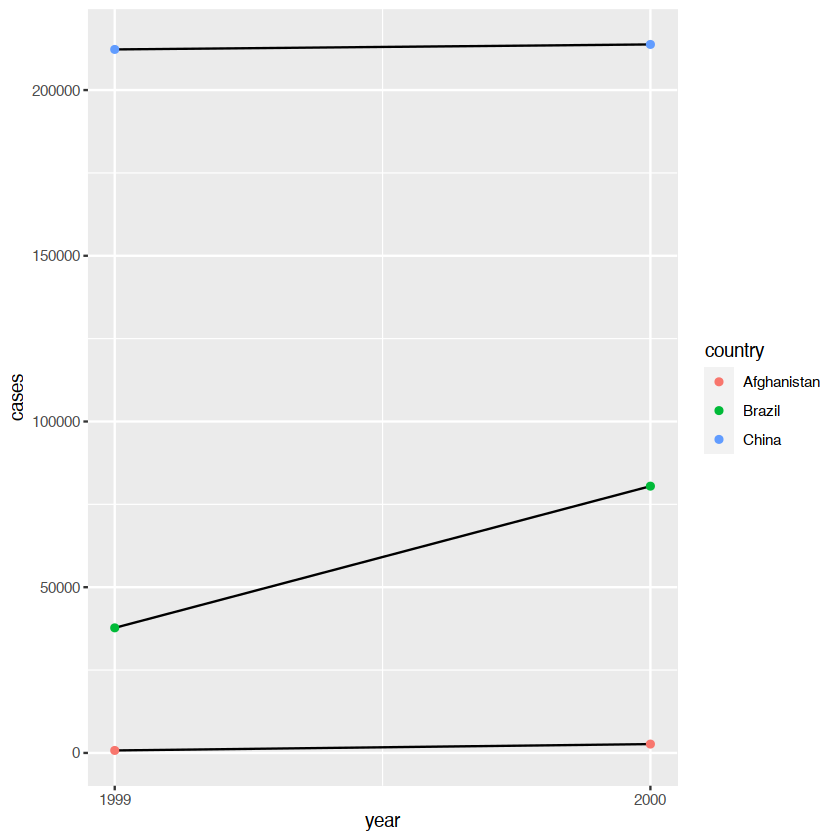

In [8]:
ggplot(table1, aes(year, cases)) +
    geom_line(aes(group = country)) +
    geom_point(aes(color = country)) +
    scale_x_continuous(breaks=c(1999, 2000))

If the data is not already tidy, then we might need to some work before we can use the tools in `dplyr`. The package `tidyr` inside `tidyverse` allows one to convert data into the tidy data.

# Pivot longer

One type of problem in when a variable is spread across multiple columns and we need to gather those columns to create a new pair of variables.

We need to specify three things:

* which existing columns correspond to values of a variable
* what is the name of the variable (the **key**) whose values currently appear as column names
* what is the name of the variable (the **value**) whose values are currently spread over the cells 

In [9]:
print(table4a)

# A tibble: 3 x 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


Above, the **key** is the variable **year** and the **value** is the variable **cases**.

In [10]:
(tidy4a <- pivot_longer(table4a, c(`1999`, `2000`), names_to = "year", values_to = "cases"))

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


A similar `gather` command will work to create the **year** and **population** variables from `table4b`. 

In [11]:
(tidy4b <- pivot_longer(table4b, c(`1999`, `2000`), names_to = "year", values_to = "population"))

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


In [12]:
left_join(tidy4a, tidy4b) # we will learn about left_join() later

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


# Pivot wider

Another type of problem in when an observation is scattered across multiple rows.

We need to specify two things:

* which existing column (the **key**) has the variable names as values
* which existing column (the **value**) has the values for those variables

In [13]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [14]:
pivot_wider(table2, names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


Remember that:

* `pivot_longer()` tends to make wide tables narrower and longer
* `pivot_wider()` tends to make long tables shorter and wider

In [15]:
(stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half   = c(   1,    2,    1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
))

year,half,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2016,1,0.92
2016,2,0.17


Let us now use `pivot_wider` pulling names from **year** and values from **return**.

In [16]:
(wider_stocks <- pivot_wider(stocks, names_from = year, values_from = return))

half,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,0.92
2,0.59,0.17


Let us now use `pivot_longer` to gather the columns to get back tidy data.

In [17]:
(stocks_new <- pivot_longer(wider_stocks, c(`2015`,`2016`), names_to = "year", values_to = "return"))

half,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
1,2016,0.92
2,2015,0.59
2,2016,0.17


Looks the same as **stocks**, doesn't it? The columns are ordered differently, but we can fix that.

In [18]:
(stocks_new <- select(stocks_new, year, half, return))

year,half,return
<chr>,<dbl>,<dbl>
2015,1,1.88
2016,1,0.92
2015,2,0.59
2016,2,0.17


Here's the old **stocks** tibble for reference.

In [19]:
stocks

year,half,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2016,1,0.92
2016,2,0.17


They look pretty much the same but let us examine the **types** of the variables.

In [20]:
print(stocks)

# A tibble: 4 x 3
   year  half return
  <dbl> <dbl>  <dbl>
1  2015     1   1.88
2  2015     2   0.59
3  2016     1   0.92
4  2016     2   0.17


In [21]:
print(stocks_new)

# A tibble: 4 x 3
  year   half return
  <chr> <dbl>  <dbl>
1 2015      1   1.88
2 2016      1   0.92
3 2015      2   0.59
4 2016      2   0.17


The **year** variable used to be of type **dbl** but is now **chr**. We can fix this too.

In [22]:
stocks_new <- mutate(stocks_new, year = as.double(year))
print(stocks_new)

# A tibble: 4 x 3
   year  half return
  <dbl> <dbl>  <dbl>
1  2015     1   1.88
2  2016     1   0.92
3  2015     2   0.59
4  2016     2   0.17


In [23]:
people <- tribble(
  ~name,             ~names,  ~values,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)

In [24]:
pivot_wider(people, names_from = names, values_from = values)

Warning message:
“Values are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = length` to identify where the duplicates arise
* Use `values_fn = {summary_fun}` to summarise duplicates”


name,age,height
<chr>,<list>,<list>
Phillip Woods,"45, 50",186
Jessica Cordero,37,156


We received a warning since there are two values of `age` for `Phillip Woods`. How should we deal with this? One solution is to add a new column with something that is unique by definition, e.g., `row_number()`.

In [25]:
people %>%
    mutate(row = row_number()) %>%
    pivot_wider(names_from = names, values_from = values)

name,row,age,height
<chr>,<int>,<dbl>,<dbl>
Phillip Woods,1,45,NA
Phillip Woods,2,NA,186
Phillip Woods,3,50,NA
Jessica Cordero,4,37,NA
Jessica Cordero,5,NA,156


But this doesn't quite work because now the code works as if there are 3 Phillip Woods and 2 Jessica Cordero! So we need to add row number _after_ grouping by `name` and `names`

In [26]:
people %>%
    group_by(name, names) %>%
    mutate(row = row_number()) %>%
    pivot_wider(names_from = names, values_from = values)

name,row,age,height
<chr>,<int>,<dbl>,<dbl>
Phillip Woods,1,45,186
Phillip Woods,2,50,NA
Jessica Cordero,1,37,156


There are still two issues:
- This gives us a _grouped tibble_ 
- We might want to get rid of the variable `row` (it was only useful temporarily)

In [27]:
people %>%
    group_by(name, names) %>%
    mutate(row = row_number()) %>%
    pivot_wider(names_from = names, values_from = values) %>%
    ungroup() %>%
    select(-row)

name,age,height
<chr>,<dbl>,<dbl>
Phillip Woods,45,186
Phillip Woods,50,NA
Jessica Cordero,37,156
